# Weather Patterns Data Visualization Exercise
A data visualization of the record high and low temperatures by day of the year over the period 2005-2014 overlaid by high and low temperatures in 2015 that broke the ten year record. Data was recorded near Ann Arbor, MI.

## Load libraries and read data

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates

weather = pd.read_csv('assetsweatherdata.csv')

## Aggregate, transform, and filter data

In [27]:
#Convert to dates to datetime
weather['Date'] = pd.to_datetime(weather['Date'])
weather = weather.sort_values(by='Date')

#Convert units from tenths of degrees C to degrees C
weather['Data_Value'] = weather['Data_Value']/10

#Aggregate by max and min data values and remove extra days of leap years 
#to simplify analysis and 2015 data for line plots
weather_max = weather.groupby(['Date'])['Data_Value'].agg('max').reset_index()
weather_max = weather_max.drop(weather_max.index[[1154, 2615]])
weather_max = weather_max[weather_max['Date']<'2015-01-01']

weather_min = weather.groupby(['Date'])['Data_Value'].agg('min').reset_index()
weather_min = weather_min.drop(weather_min.index[[1154, 2615]])
weather_min = weather_min[weather_min['Date']<'2015-01-01']

#Change data to month and day only
weather_max['Date'] = weather_max['Date'].dt.strftime('%m-%d')
weather_min['Date'] = weather_min['Date'].dt.strftime('%m-%d')

#Get max and min per day
weather_max_day = weather_max.groupby(['Date'])['Data_Value'].agg('max').reset_index()
weather_min_day = weather_min.groupby(['Date'])['Data_Value'].agg('min').reset_index()

#Filter out 2015 data for scatter plot
for_scatter = weather[weather['Date']>= '2015-01-01']
for_scatter_max = for_scatter.groupby(['Date'])['Data_Value'].agg('max').reset_index()
for_scatter_min = for_scatter.groupby(['Date'])['Data_Value'].agg('min').reset_index()

#Extract max and min temps from agg dataframe
max_temp = [x for x in weather_max_day['Data_Value']]
min_temp = [x for x in weather_min_day['Data_Value']]
dates_list = [x for x in weather_max_day['Date']]

#Extract max and min temps from 2015 dataframe
scatter_max = [x for x in for_scatter_max['Data_Value']]
scatter_min = [x for x in for_scatter_min['Data_Value']]

#Find 2015 data points that broke the record
extreme_temp_max = []
extreme_temp_min =[]
extreme_days_max = []
extreme_days_min = []

for i in range(len(scatter_max)):
    if scatter_max[i] > max_temp[i]:
        temp = scatter_max[i]
        extreme_temp_max.append(temp)
        extreme_days_max.append(dates_list[i])

for i in range(len(scatter_min)):
    if scatter_min[i] < min_temp[i]:
        temp = scatter_min[i]
        extreme_temp_min.append(temp)
        extreme_days_min.append(dates_list[i])     

#Format dates data        
new_list = []
for date in dates_list:
    new = datetime.strptime(date, '%m-%d')
    new_list.append(new)

dates_plot = pd.to_datetime(dates_list, format='%m-%d')
extreme_days_max_plot = pd.to_datetime(extreme_days_max, format='%m-%d')
extreme_days_min_plot = pd.to_datetime(extreme_days_min, format='%m-%d')

## Plot weather patterns

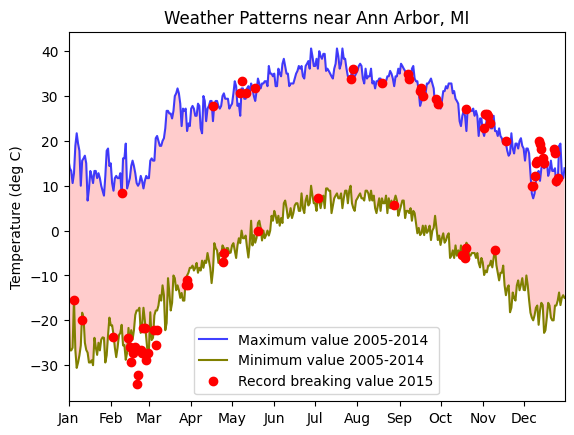

In [29]:
plt.figure()
plt.plot(dates_plot, max_temp, '-', color='blue', alpha = 0.75)
plt.plot(dates_plot, min_temp, '-', color='olive')
plt.plot(extreme_days_max_plot, extreme_temp_max, 'o', extreme_days_min_plot, extreme_temp_min, 'o', color='r')
plt.legend(['Maximum value 2005-2014', 'Minimum value 2005-2014', 
            'Record breaking value 2015'])
plt.fill_between(new_list, max_temp, min_temp, facecolor='r', interpolate=True, alpha=0.2)
ax = plt.gcf().axes[0]
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))
plt.gca().set_xlim(new_list[0],new_list[364])

plt.ylabel('Temperature (deg C)')
plt.title('Weather Patterns near Ann Arbor, MI')
plt.show()